In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("278k_song_labelled.csv", sep = ",")
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [4]:
# Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}
df = df.drop('Unnamed: 0', axis=1)

In [5]:
pd.set_option('display.max_columns', None)
summary_stats = df.groupby('labels').describe()
summary_stats

duration (ms)                                                   \
               count           mean            std      min       25%   
labels                                                                  
0            82058.0  256523.538156  139933.642559   6706.0  184813.0   
1           106429.0  222212.196695   87218.702658  15705.0  173269.0   
2            47065.0  234273.547881   90298.734385  21093.0  184779.0   
3            42386.0  209828.267140  148594.913734   7229.0  131352.5   

                                       danceability                      \
             50%        75%        max        count      mean       std   
labels                                                                    
0       232730.0  292183.75  3603000.0      82058.0  0.504659  0.161729   
1       208950.0  250067.00  3257444.0     106429.0  0.677576  0.128880   
2       217879.0  264080.00  3600000.0      47065.0  0.499236  0.156925   
3       178910.0  243533.00  3919895.0      42386.0  0.390750  0.203188   

                                              energy                      \
           min    25%    50%    75%    max     count      mean       std   
labels                                                                     
0       0.0000  0.398  0.514  0.620  0.985   82058.0  0.396732  0.194456   
1       0.0575  0.597  0.687  0.769  0.989  106429.0  0.690979  0.146609   
2       0.0000  0.401  0.499  0.595  0.987   47065.0  0.869810  0.103008   
3       0.0000  0.210  0.380  0.543  0.986   42386.0  0.182639  0.174265   

                                             loudness                       \
             min     25%    50%    75%  max     count       mean       std   
labels                                                                       
0       0.000000  0.2560  0.391  0.529  1.0   82058.0 -11.614655  4.767172   
1       0.000353  0.5820  0.696  0.803  1.0  106429.0  -7.250902  2.790555   
2       0.001850  0.8190  0.897  0.948  1.0   47065.0  -5.449567  2.571262   
3       0.000020  0.0467  0.132  0.269  1.0   42386.0 -21.214265  7.007697   

                                                speechiness            \
           min       25%     50%     75%    max       count      mean   
labels                                                                  
0      -60.000 -13.83000 -10.751  -8.334 -0.137     82058.0  0.065875   
1      -39.795  -8.76400  -6.886  -5.325  4.142    106429.0  0.111498   
2      -34.714  -6.65400  -5.116  -3.785  4.882     47065.0  0.100959   
3      -58.660 -25.75075 -20.416 -15.984  1.260     42386.0  0.056873   

                                                       acousticness            \
             std    min     25%     50%     75%    max        count      mean   
labels                                                                          
0       0.118144  0.000  0.0312  0.0367  0.0483  0.965      82058.0  0.584417   
1       0.122253  0.022  0.0389  0.0584  0.1320  0.965     106429.0  0.210132   
2       0.101078  0.000  0.0476  0.0663  0.1090  0.961      47065.0  0.032767   
3       0.060061  0.000  0.0373  0.0430  0.0532  0.959      42386.0  0.839515   

                                                             instrumentalness  \
             std       min       25%      50%     75%    max            count   
labels                                                                          
0       0.310905  0.000000  0.330000  0.66700  0.8560  0.996          82058.0   
1       0.213602  0.000002  0.038300  0.13300  0.3240  0.995         106429.0   
2       0.099628  0.000000  0.000416  0.00351  0.0203  0.991          47065.0   
3       0.245776  0.000000  0.824000  0.95200  0.9870  0.996          42386.0   

                                                                          \
            mean       std       min       25%       50%      75%    max   
labels                                                                     
0       0.158

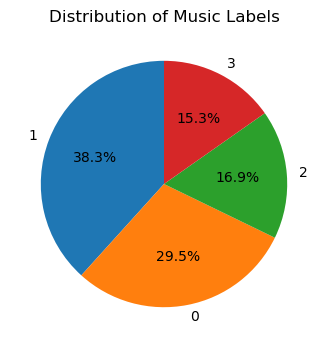

In [6]:
# Count the occurrences of each label
label_counts = df['labels'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Labels')
plt.show()

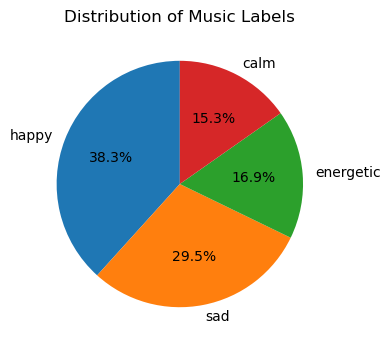

In [7]:
# Map numerical labels to their corresponding emotions
label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
df['emotion'] = df['labels'].map(label_mapping)

# Count the occurrences of each label
label_counts = df['emotion'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Labels')
plt.show()

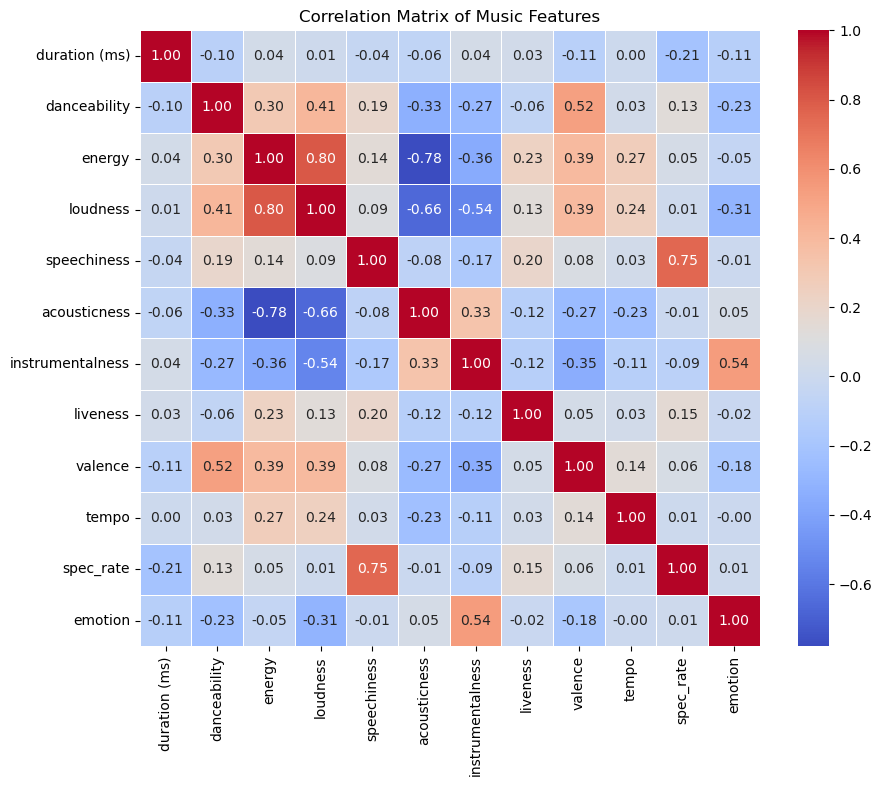

In [14]:
# Rename the 'labels' column to 'emotion'
df = df.rename(columns={'labels': 'emotion'})

# Calculate the correlation matrix
correlation_matrix = df[df.columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Music Features')
plt.show()

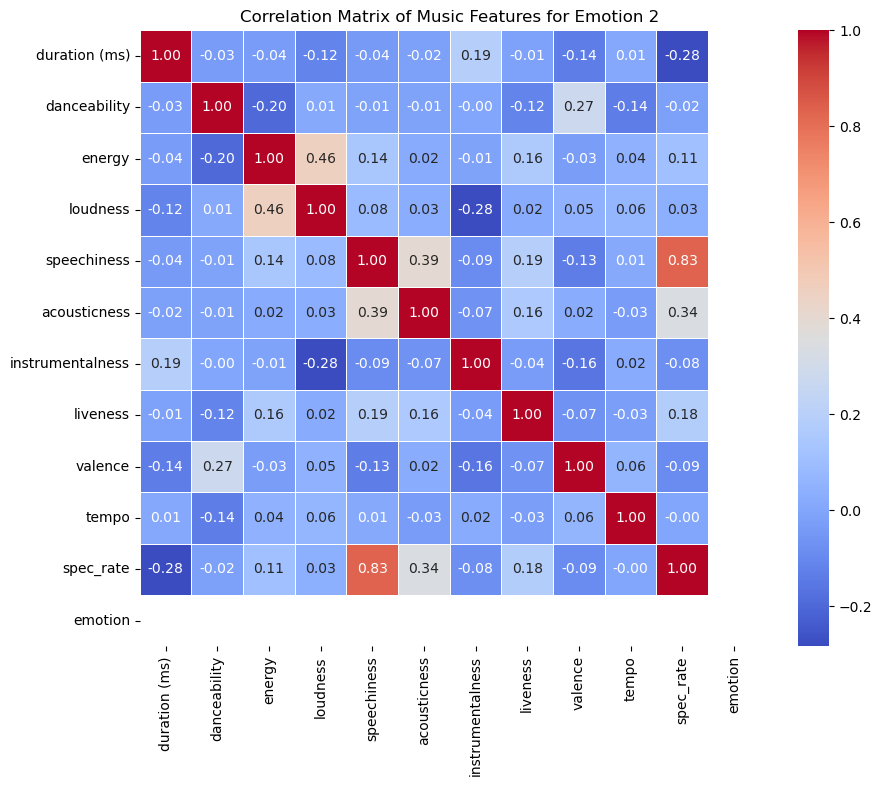

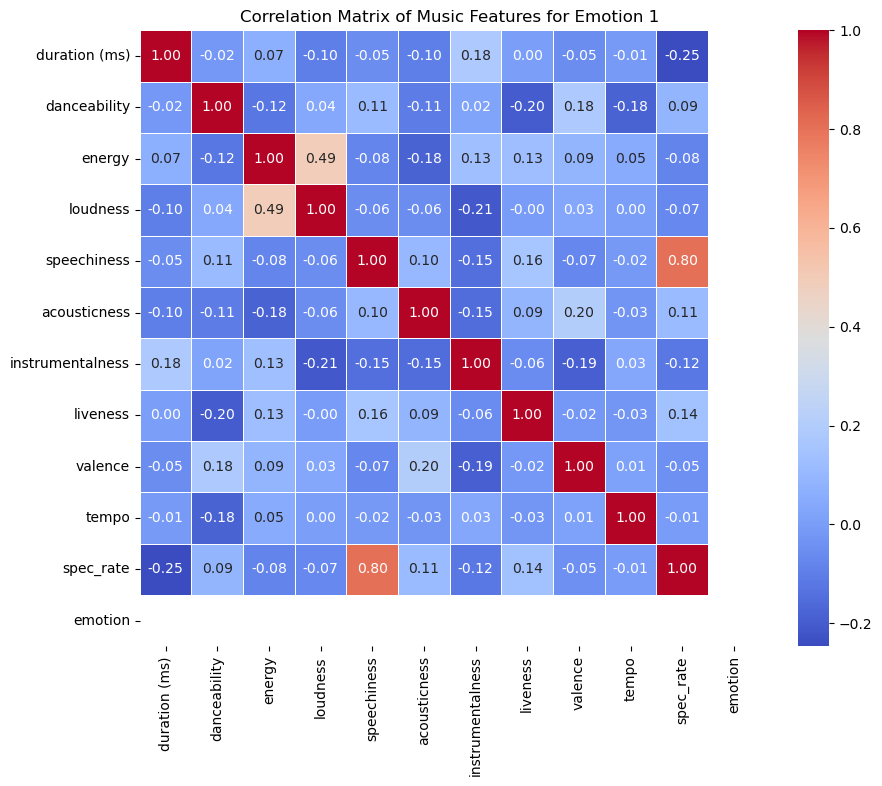

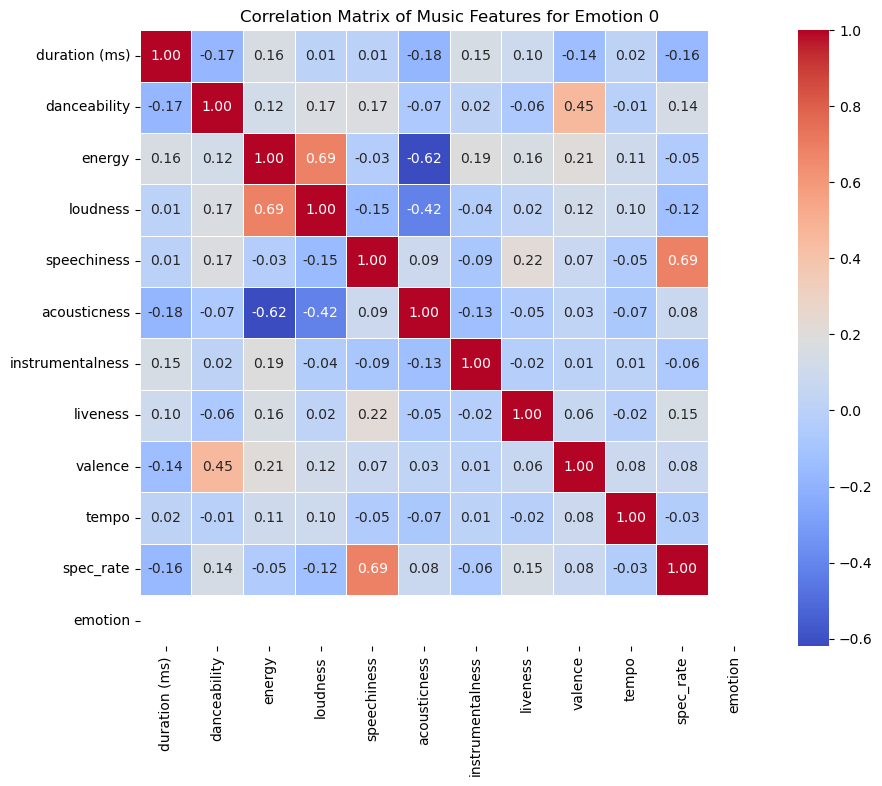

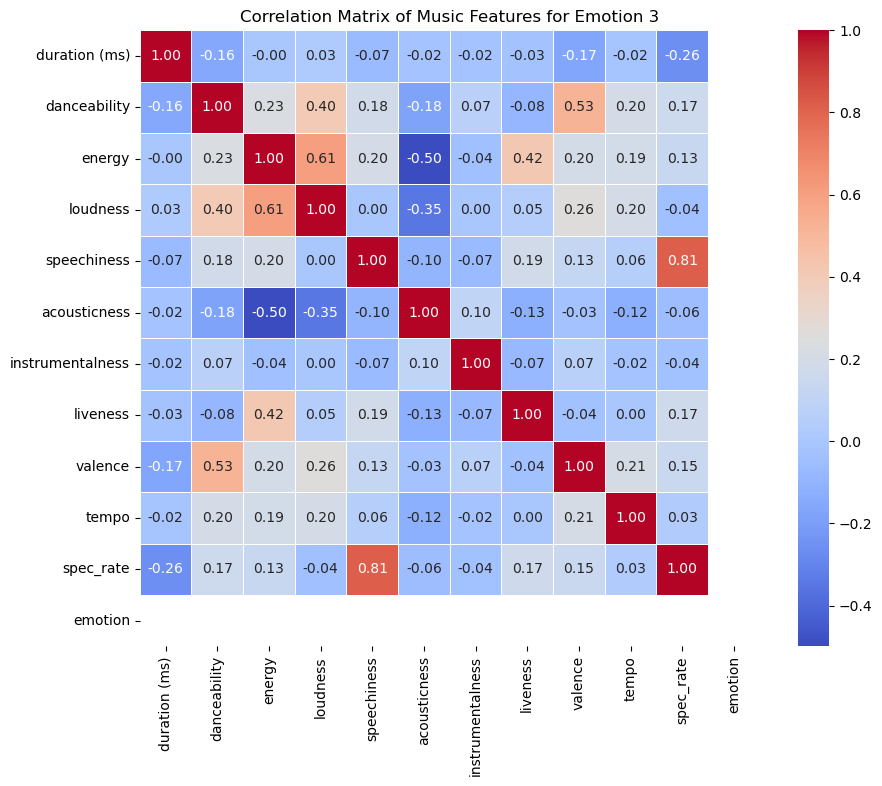

In [16]:
# # Map numerical labels to their corresponding emotions
# label_mapping = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
# df['emotion'] = df['labels'].map(label_mapping)

# # Select relevant columns for correlation analysis
# columns_for_correlation = df.columns[1:-3]  # Exclude 'labels', 'spec_rate', and 'emotion' columns

# Calculate and visualize correlations for each emotion label separately
for emotion_label in df['emotion'].unique():
    subset_df = df[df['emotion'] == emotion_label]
    
    # Calculate the correlation matrix
    correlation_matrix = subset_df[df.columns].corr()

    # Create a heatmap to visualize the correlations for each emotion label
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix of Music Features for Emotion {emotion_label}')
    plt.show()

NameError: name 'hd' is not defined